In [3]:
import matplotlib.pyplot as plt
import plot_utils as u
import csv
from pathlib import Path
import numpy as np

In [4]:
i = 300
for lam in [3e-09]:
    for kp in np.arange(0.04, 1.05, 0.1):
        with open(f"pi_configs/ift_{i}.yml", "w") as f:
            print(f"""---
# Simulation
Controller: IFT
RunTime: 128000
RandomSeed: 9501
beta_burst_modulation_scale: 0.02
ctx_dc_offset: 0.05
save_stn_voltage: False
save_ctx_voltage: False

# Controller
controller_window_length: 5000
setpoint: 0
kp: {kp}
ti: 1.1
ts: 0.02
min_value: 0.0
max_value: 3.0

# IFT specific options
stage_length: 15
gamma: 10000
lam: {lam}
min_kp: 0.01
min_ti: 0.01
fix_ti: False
""", file=f)
        i += 1

In [ ]:
i = 301
for ti in [1.1, 1.2]:
    for kp in np.arange(1.5, 2.0, 0.01):
        with open(f"pi_configs/pi_{i}.yml", "w") as f:
            print(f"""---
# Simulation
Controller: PID
RunTime: 64000
RandomSeed: 9501
save_stn_voltage: False
save_ctx_voltage: False

# Controller
setpoint: 1.0414e-04
kp: {kp}
ti: {ti}
ts: 0.02
min_value: 0.0
max_value: 3.0""", file=f)
        i += 1

In [ ]:
# dirname = 'ift/ift-20230106230542-1'
dirname = 'ift/ift-20230109161353-7'


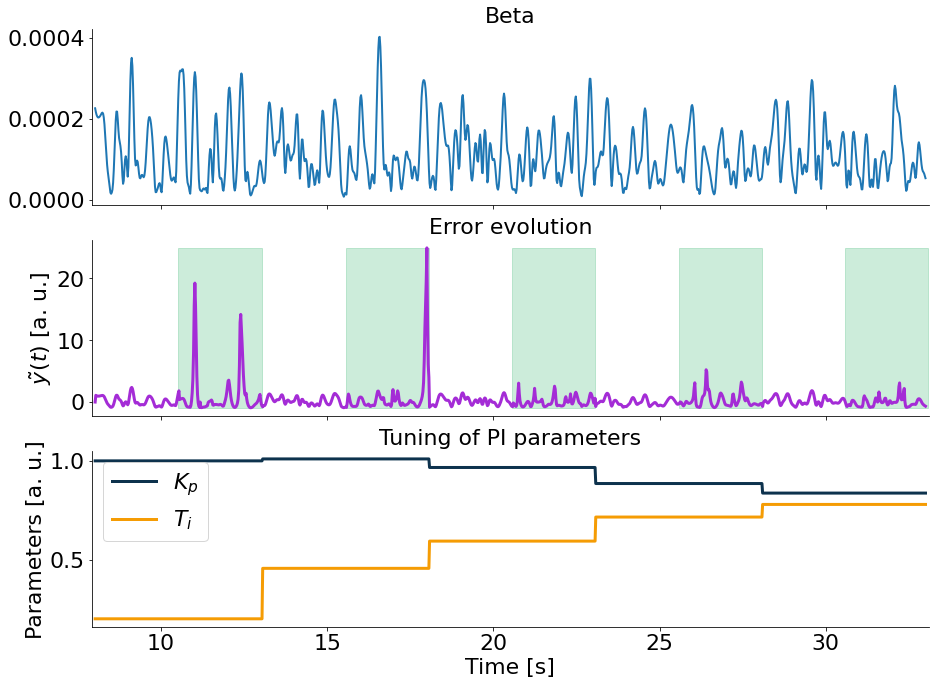

In [ ]:
fontsize=22
fig, axs = plt.subplots(3, 1, figsize=(15, 11), sharex=True)
u.plot_ift_signals(dirname, axs, max_t=1250, linewidth=3, fontsize=fontsize)
for ax in axs:
    ax.spines[['right', 'top']].set_visible(False)
axs[2].set_xlabel('Time [s]', fontsize=fontsize)
axs[0].set_title('Beta', fontsize=fontsize)
axs[1].set_title('Error evolution', fontsize=fontsize)
axs[1].set_ylabel('$\\tilde y(t)$ [a. u.]', fontsize=fontsize)
axs[2].set_ylabel('Parameters [a. u.]', fontsize=fontsize)
axs[2].set_title('Tuning of PI parameters', fontsize=fontsize)

for a in axs:
    a.tick_params(axis='both', which='major', labelsize=fontsize)
    a.tick_params(axis='both', which='minor', labelsize=fontsize)
plt.savefig(Path('C:/cic/wrk/20230403_ner_poster/') / 'ift_signals.svg', bbox_inches='tight')

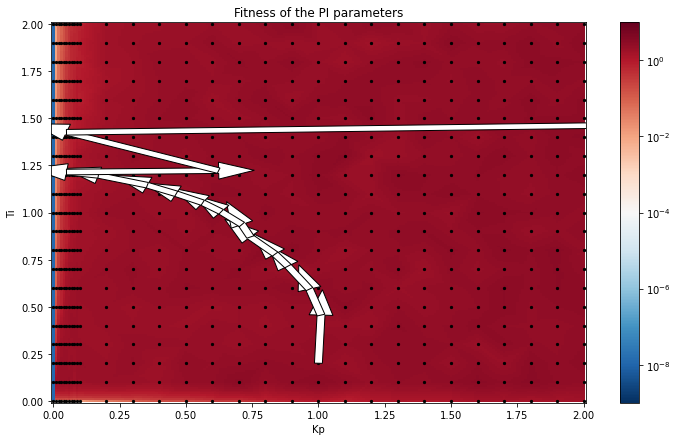

In [ ]:
tt, _, _, _, _, parameters, _ = u.read_ift_results(dirname)
u.plot_ift_trajectory('PI_grid_search_12', parameters, lam=1)

Lambda: 0, Initial value: (0.05, 1.30), Final value: (0.96, 1.29)
Lambda: 1, Initial value: (1.00, 0.20), Final value: (0.17, 1.20)


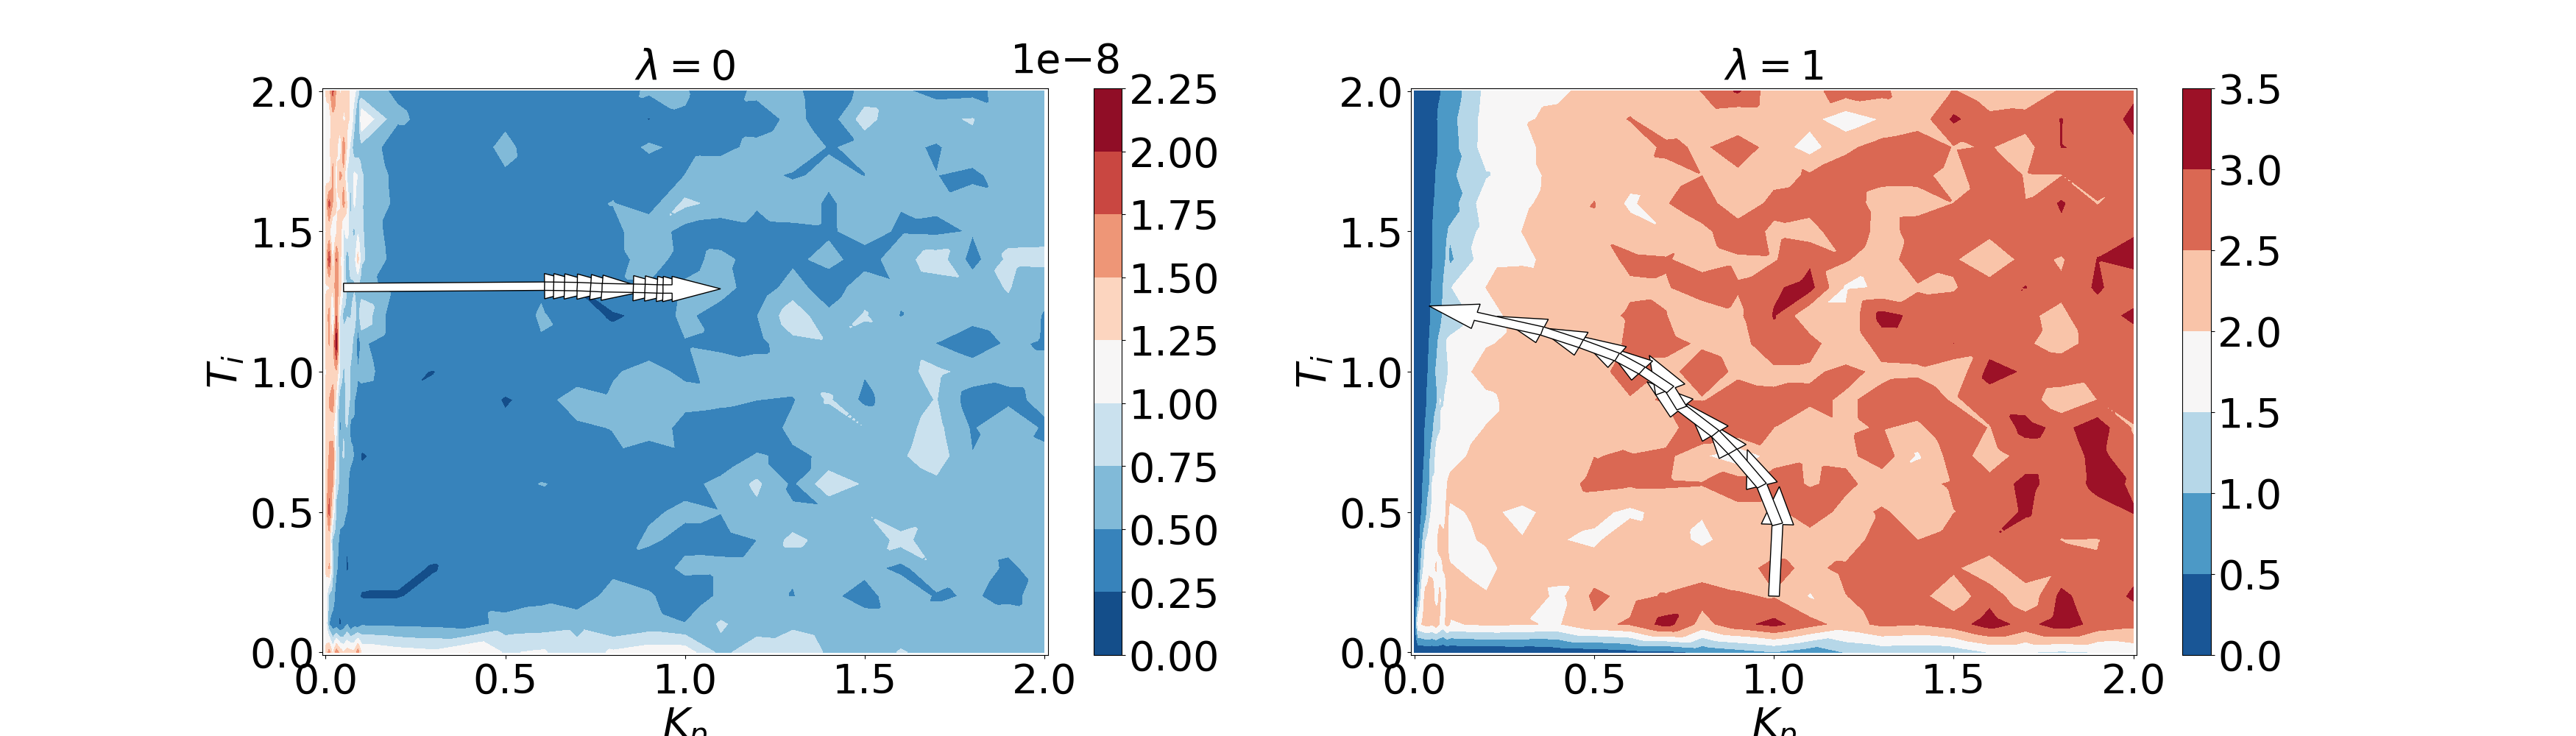

In [18]:
%matplotlib widget
u.plot_two_trajectories('PI_grid_search_12',
                        'ift/ift-20230109161353-8', 0,
                        'ift/ift-20230109161353-7', 1,
                        timestop1=60, timestop2=60)
plt.savefig(Path('C:/cic/wrk/zz_archive/20221115_ner2023_paper/') / 'ift_working.eps', bbox_inches='tight')
plt.savefig(Path('C:/cic/wrk/zz_archive/20230403_ner_poster/') / 'ift_working.svg', bbox_inches='tight')
plt.savefig(Path('C:/cic/wrk/zz_archive/20230403_ner_poster/') / 'ift_working.png', bbox_inches='tight')

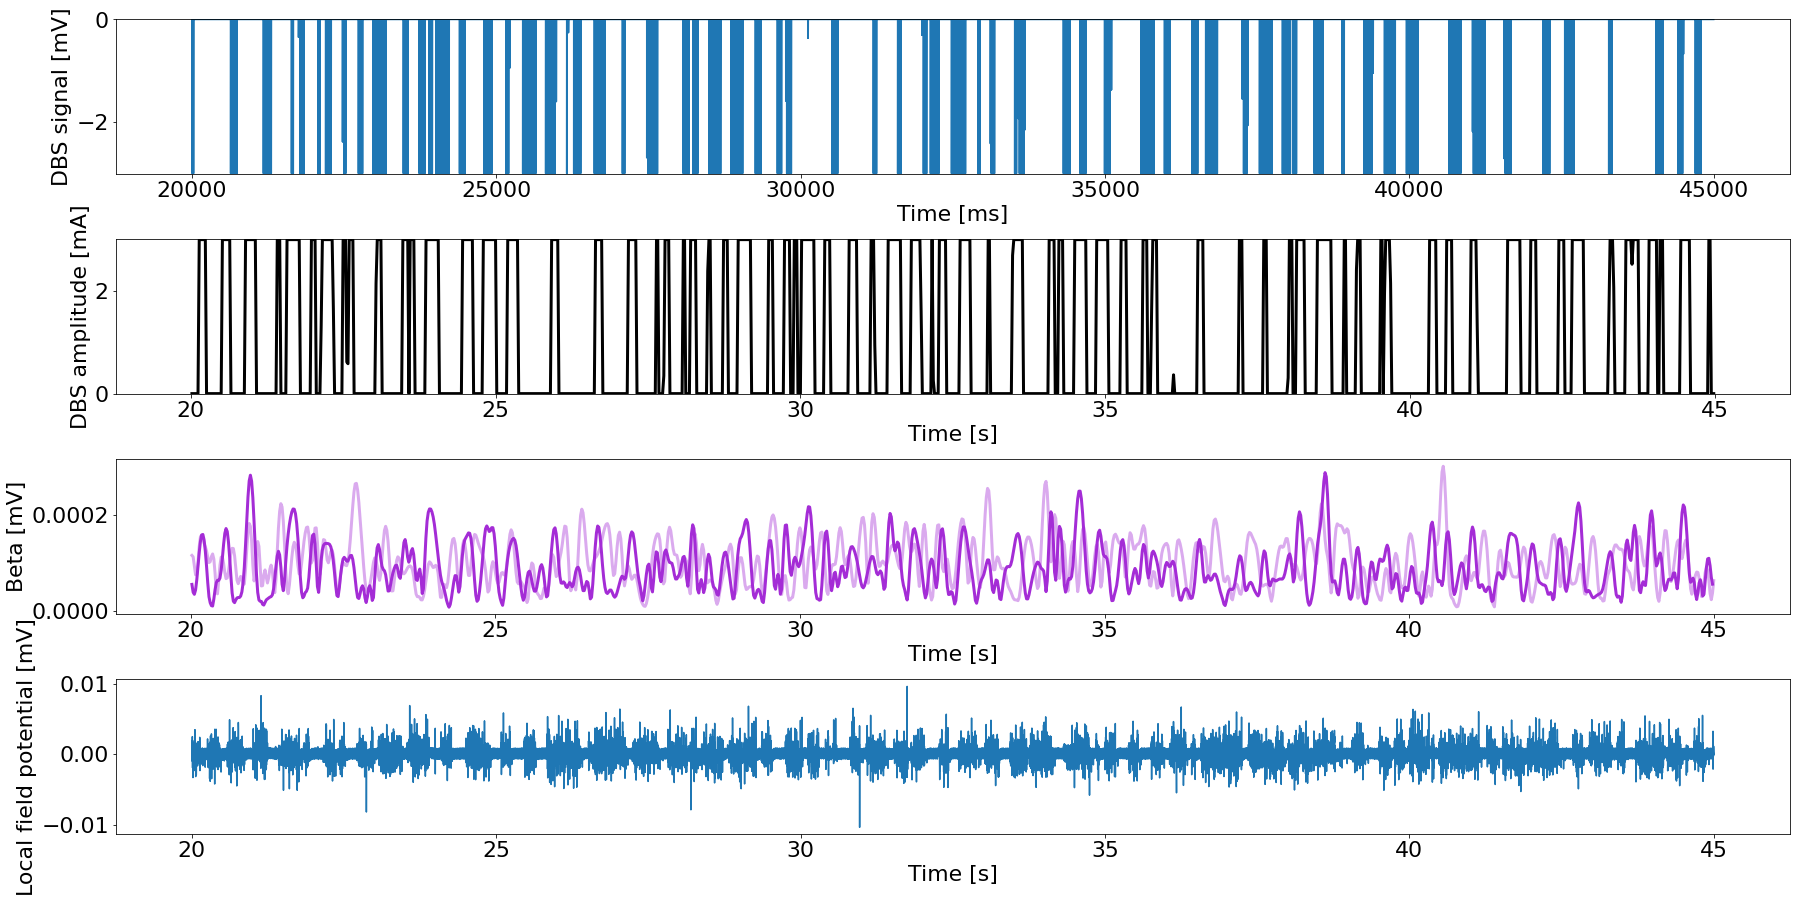

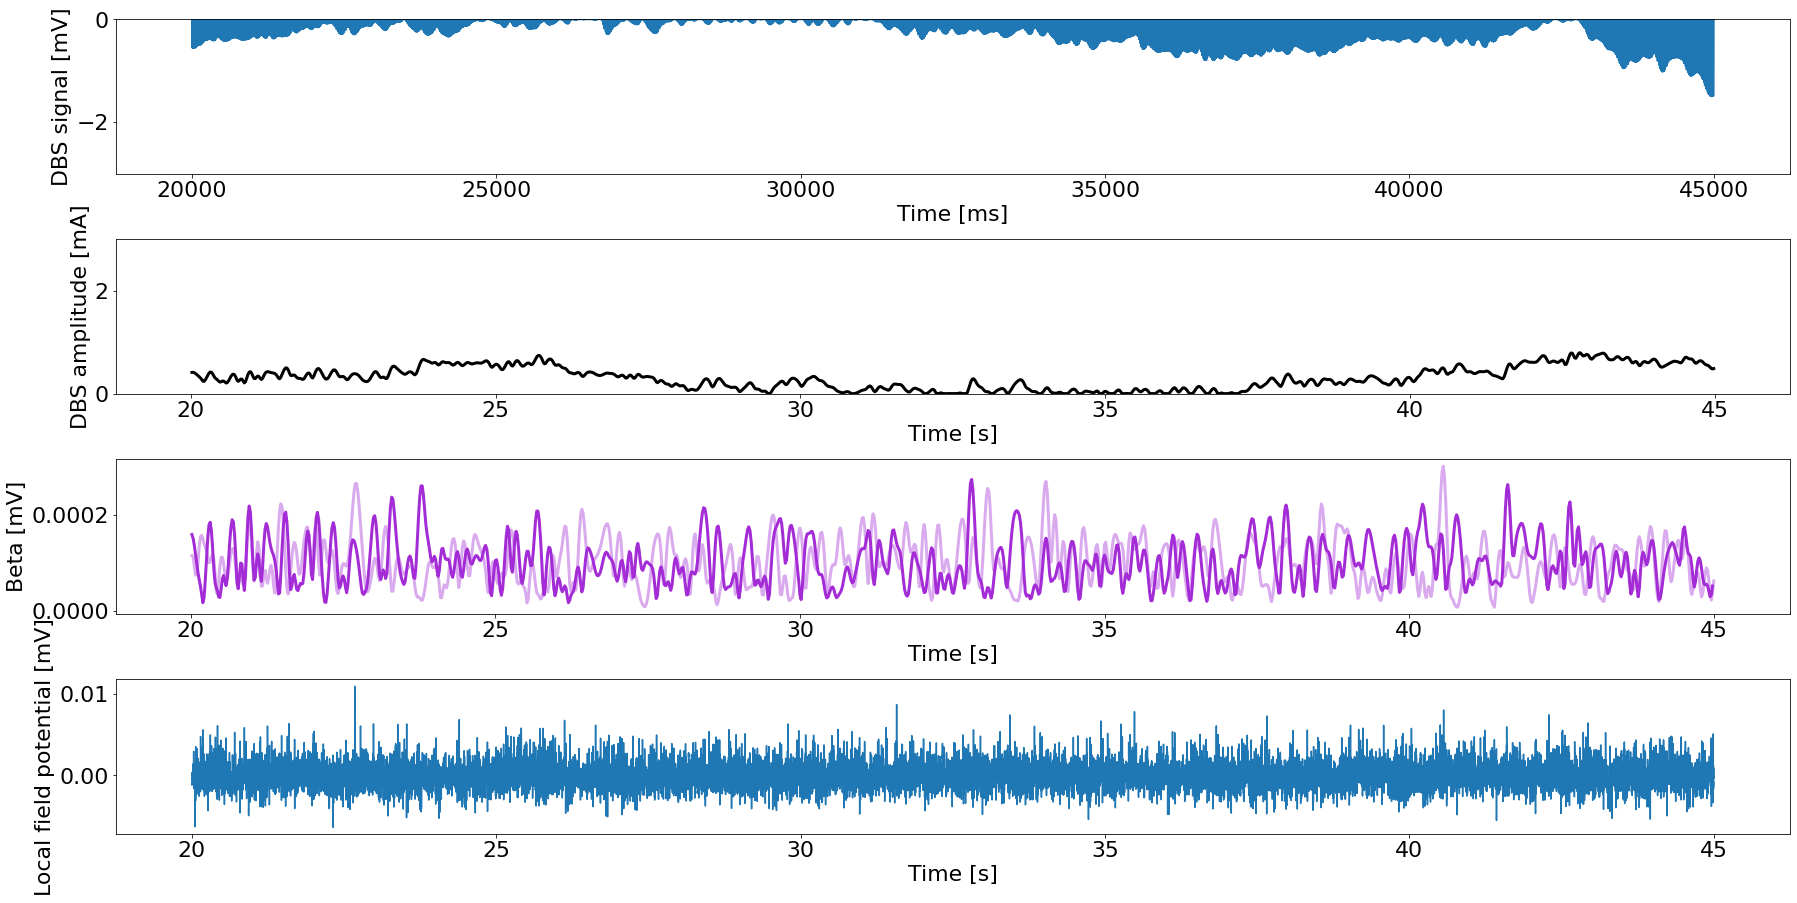

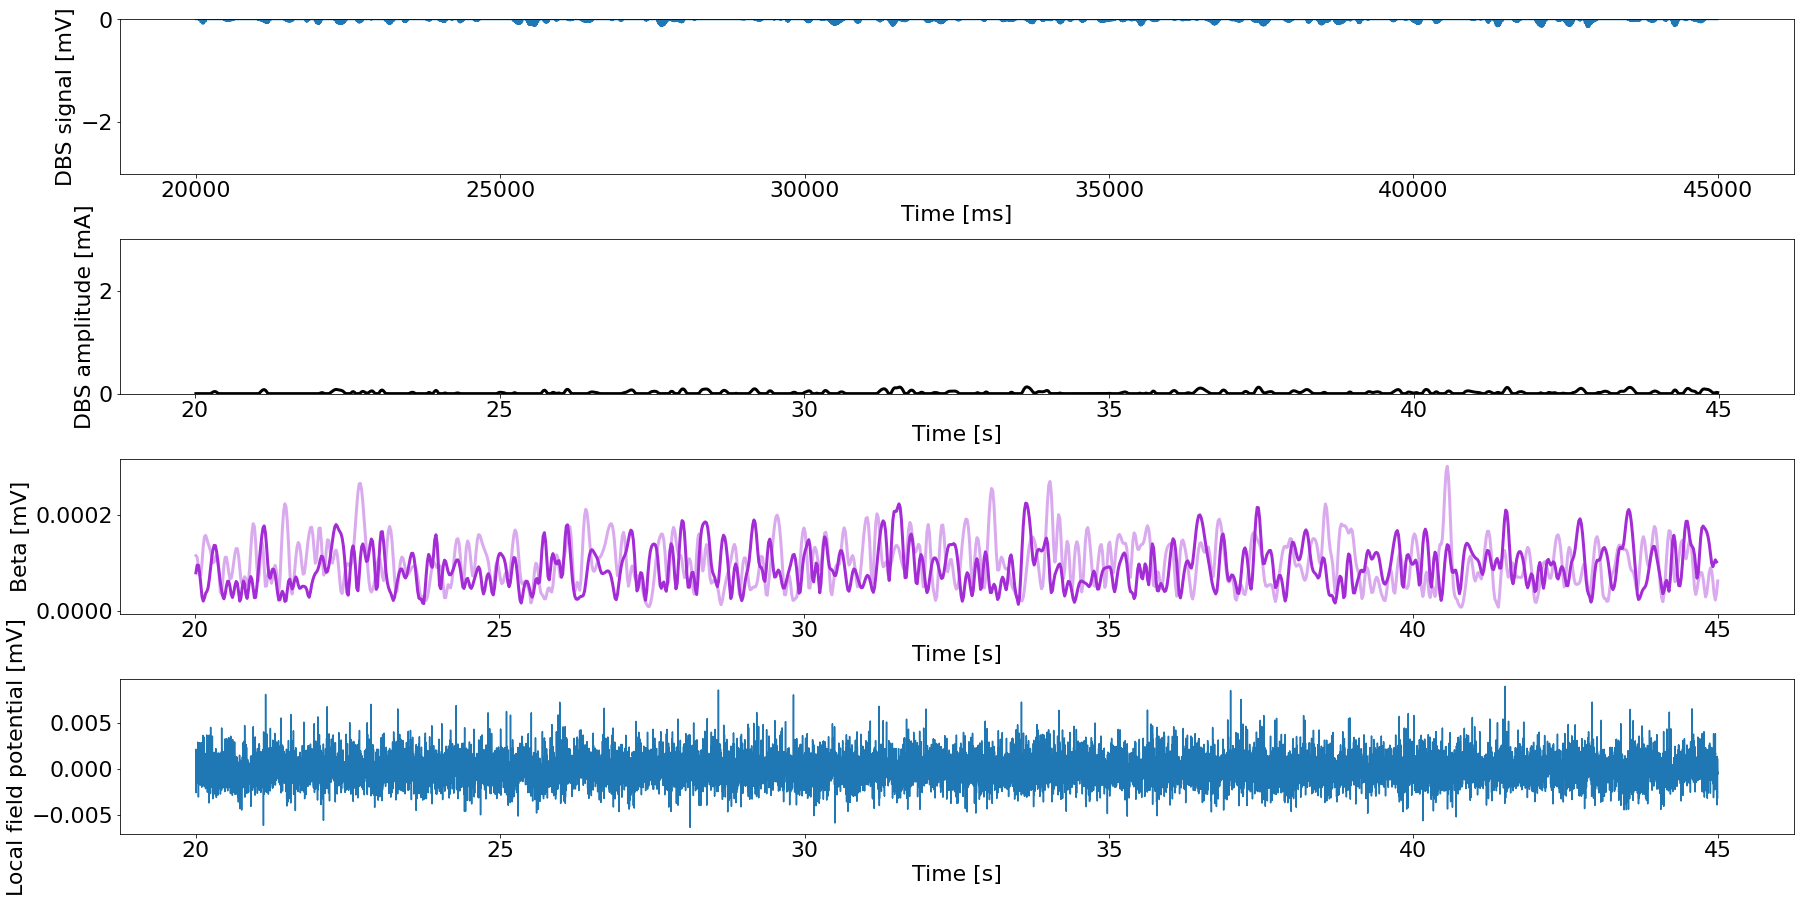

In [17]:
dirname = [
    Path('ift_pi_comparison') / 'PI-20230329113826-1', 
    Path('ift_pi_comparison') / 'PI-20230316143008',
    Path('ift_pi_comparison') / 'PI-20230328201451-11',
     
    ]
for d in dirname:
    u.load_and_plot([d], None, 6000, 130000, 20000, 45000, Path('ift_pi_comparison') / 'ZERO-20230315133536')
    plt.savefig(Path('C:/cic/wrk/zz_archive/20230403_ner_poster/') / f'ift_{d.name}.png', bbox_inches='tight')